In [1]:
# importing depedencies

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [3]:
# EDA

In [4]:
data = pd.read_csv("Train.csv")

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.shape

(8523, 12)

In [9]:
data.describe(include =object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
cat_col = data.select_dtypes(include =object).columns

In [13]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
num_col =data.select_dtypes(include = 'number')

In [15]:
num_col.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
data["Item_Weight"] =data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Outlet_Size"] =data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [18]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
data["Outlet_Size"].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [20]:
data["Item_Weight"].value_counts()

Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: count, Length: 416, dtype: int64

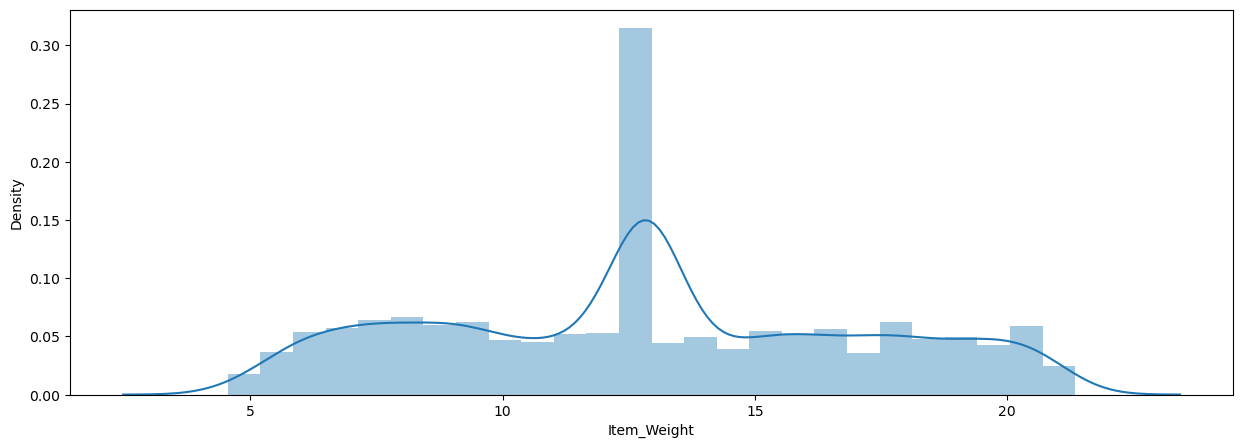

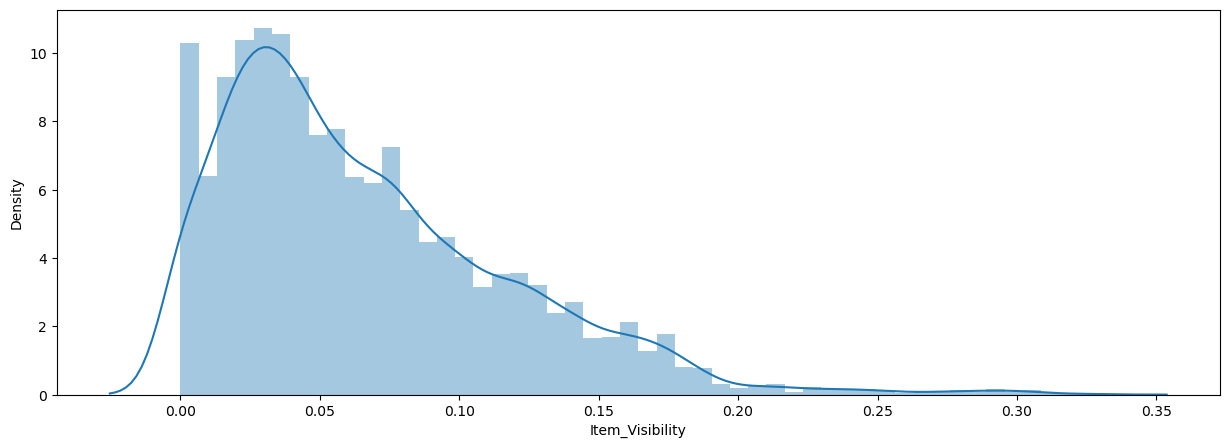

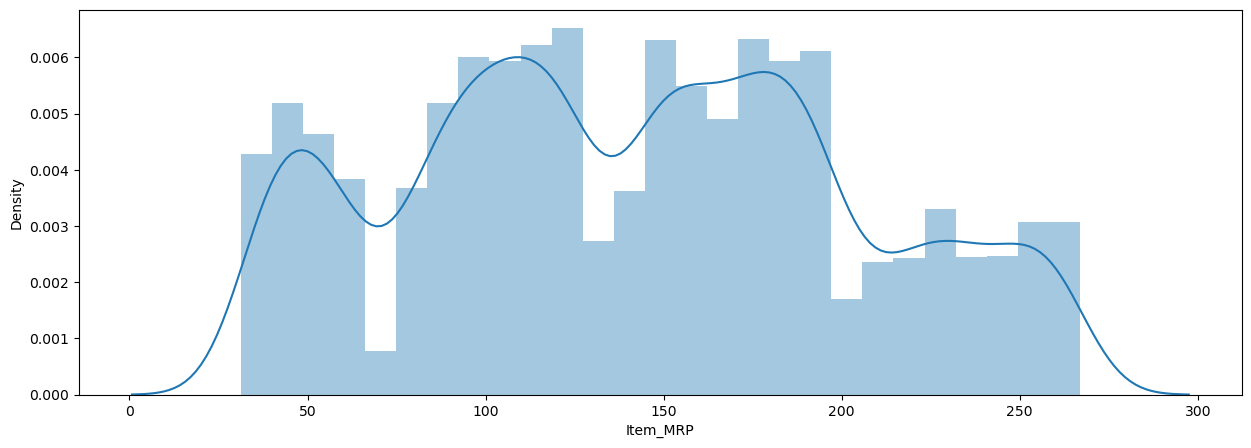

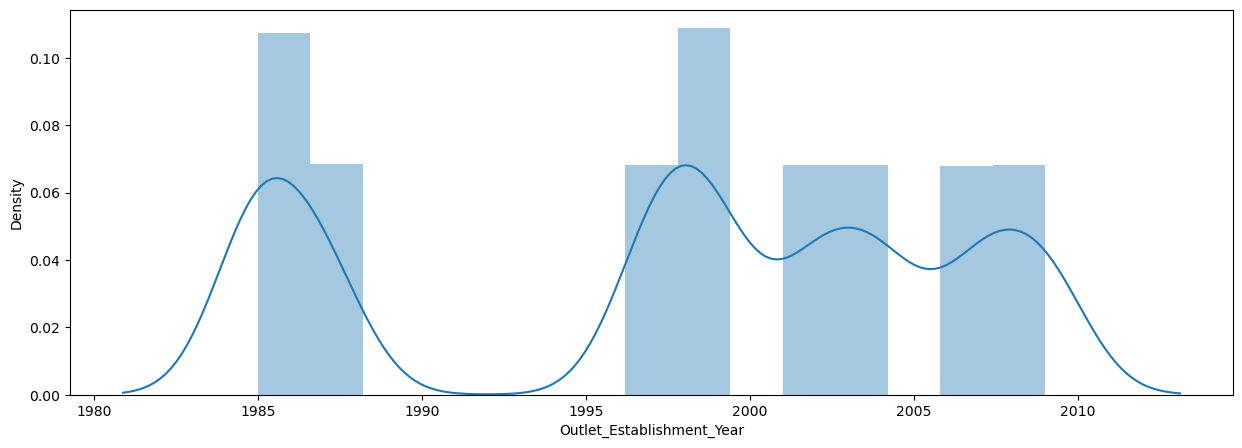

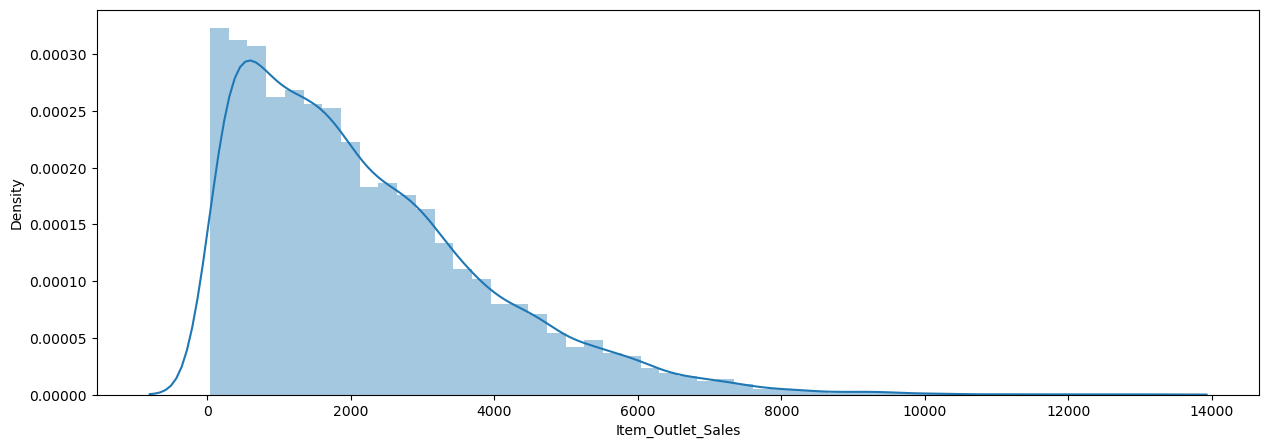

In [21]:
for col in num_col:
    plt.figure(figsize =(15,5))
    sns.distplot(data[col])
    plt.show()

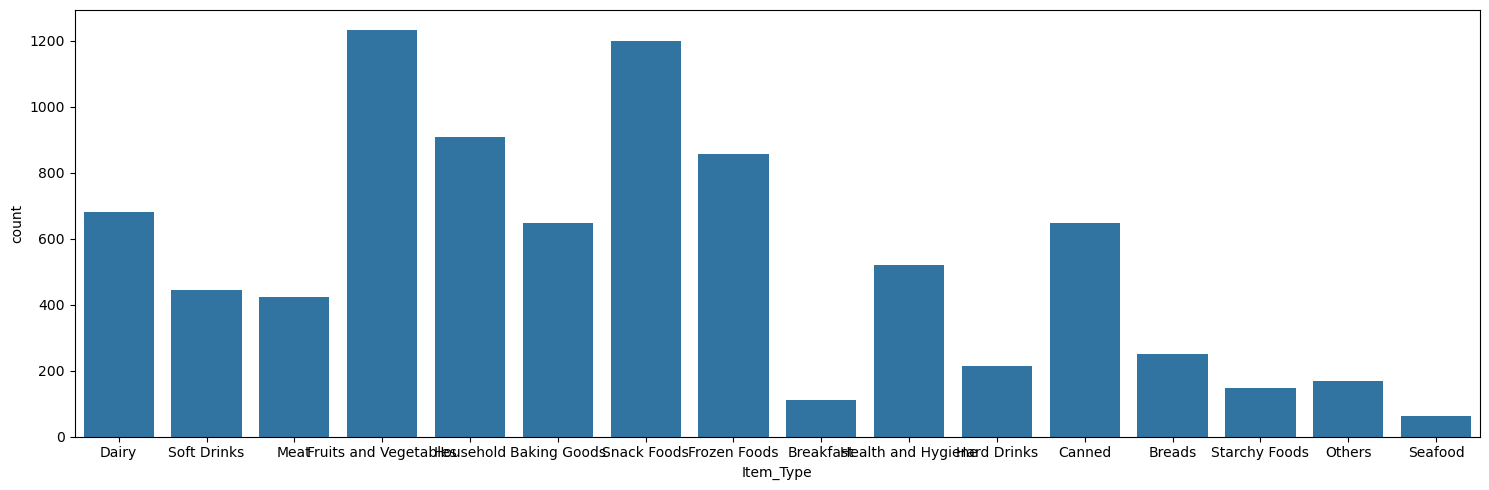

In [22]:
plt.figure(figsize =(15,5))
sns.countplot(x ='Item_Type',data =data)
plt.tight_layout()
plt.show()


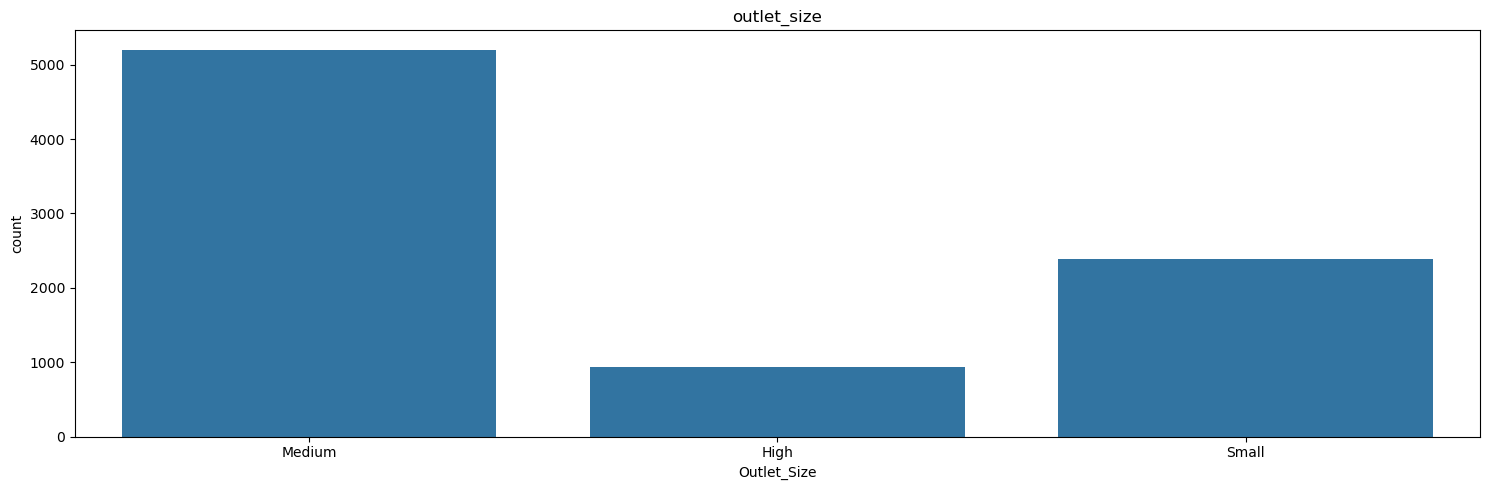

In [23]:
plt.figure(figsize =(15,5))
sns.countplot(x ='Outlet_Size',data =data)
plt.title("outlet_size")
plt.tight_layout()
plt.show()


In [24]:
# Data Preprocessing

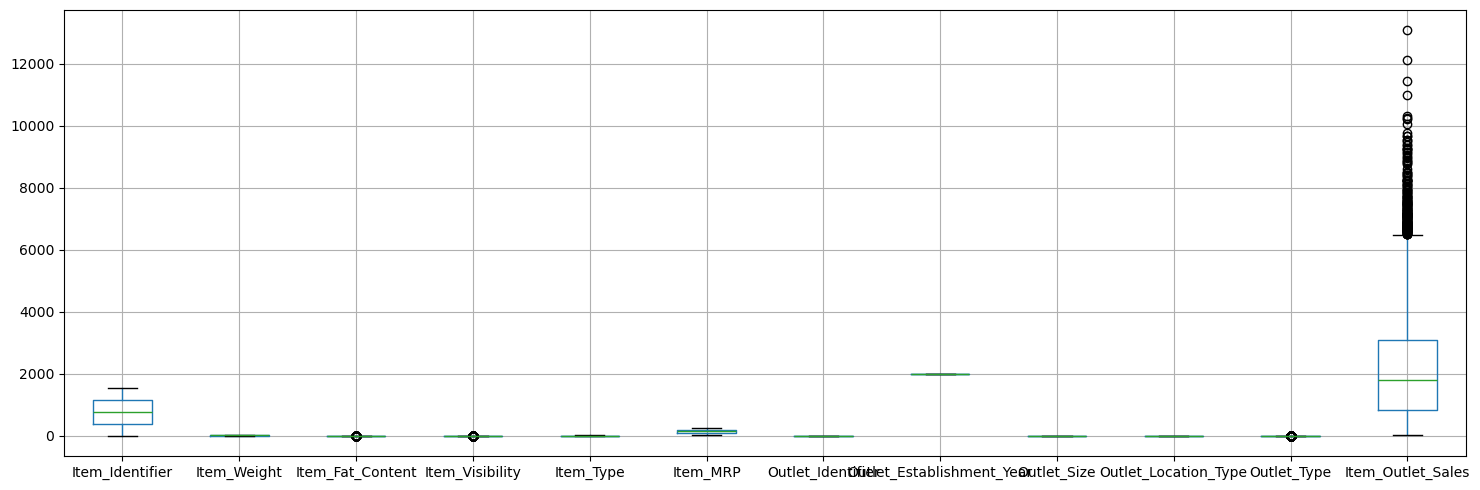

In [63]:
plt.figure(figsize =(15,5))
data.boxplot()
plt.tight_layout()


In [64]:
def outlier_detection(data,columns):
    for col in columns:
        Q1 =data[col].quantile(0.25)
        Q3 =data[col].quantile(0.75)
        iqr = Q3-Q1
        lower =Q1-1.5*iqr
        upper =Q3+1.5*iqr
        data[col] =data[col].clip(lower,upper)
    return data

In [72]:
data =outlier_detection(data,num_col)

In [73]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


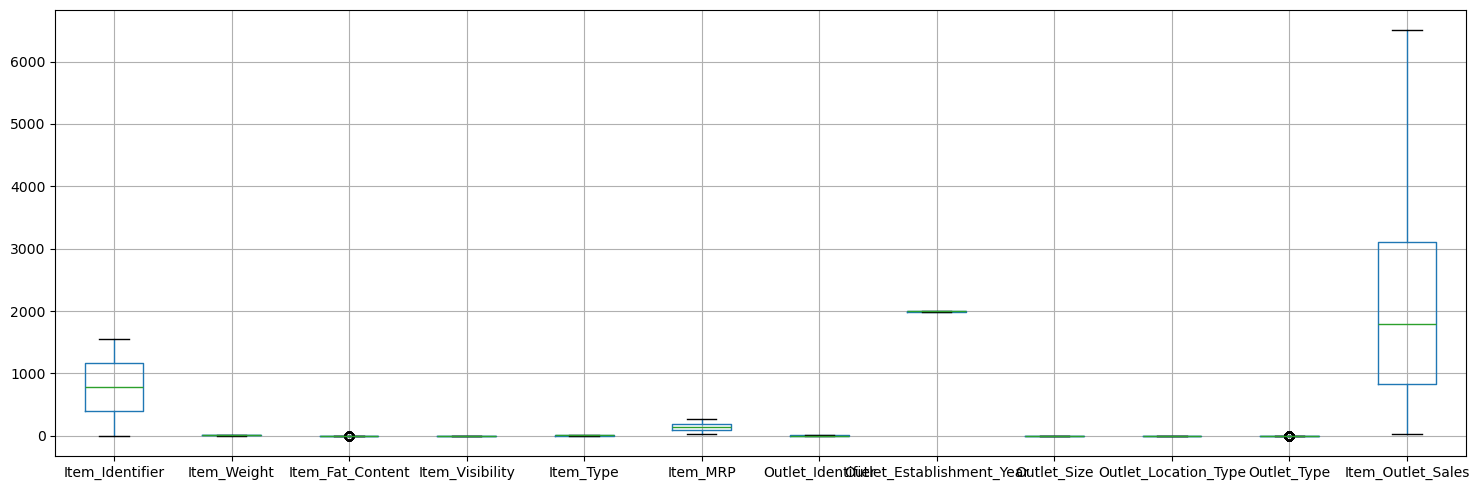

In [74]:
plt.figure(figsize =(15,5))
data.boxplot()
plt.tight_layout()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
data["Item_Identifier"] =le.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"] =le.fit_transform(data["Item_Fat_Content"])
data["Item_Type"] =le.fit_transform(data["Item_Type"])
data["Outlet_Identifier"] =le.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"] =le.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] =le.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"] =le.fit_transform(data["Outlet_Type"])


In [30]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
# splitting Features and Target 

In [75]:
x =data.iloc[:,:-1]

In [76]:
y =data.iloc[:,-1]

In [77]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [78]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =42)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6818, 11), (6818,), (1705, 11), (1705,))

In [82]:
regressor = XGBRegressor(learning_rate=0.01, max_depth = 3, n_estimators = 100)

In [83]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
sales_predictions = regressor.predict(x_train)

In [85]:
sales_predictions

array([2753.8635, 2703.3982, 1944.6472, ..., 3040.435 , 1970.1948,
       1775.9844], dtype=float32)

In [86]:
# model Evaluation on training dataset 

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_train,sales_predictions)

0.49338392554599164

In [89]:
# for testing data

In [90]:
sales_predictions_test = regressor.predict(x_test)

In [48]:
r2_score(y_test,sales_predictions_test)

0.4979658543633675

In [49]:
for i in range(1,20):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [93]:
from sklearn.linear_model import Ridge,Lasso
# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # Adjust alpha for regularization strength

# Fit the model to the training data
ridge_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate the model
mse_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 0.5349748287769462


In [94]:
y_train_pred =ridge_model.predict(x_train)

In [95]:
r2_score(y_train,y_train_pred)

0.5157304217304567

In [98]:
import pickle
with open("ridge.pickle",'wb') as file:
    pickle.dump(ridge_model,file)

In [99]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,487,14.300000,1,0.026300,5,79.4302,1,1987,0,2,1
2957,1392,7.930000,1,0.071136,8,42.7086,8,1997,2,0,1
7031,244,14.500000,2,0.041313,3,42.0454,9,1999,1,0,1
1084,14,12.857645,2,0.044767,14,173.7054,5,1985,1,2,3
856,890,10.195000,2,0.012456,10,197.5110,6,2004,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7205,526,11.800000,2,0.093656,13,127.1704,8,1997,2,0,1
3257,911,7.020000,1,0.000000,6,148.1734,3,2009,1,2,2
6346,244,14.500000,2,0.041215,3,42.0454,1,1987,0,2,1
6318,1176,9.800000,2,0.141184,0,50.5008,3,2009,1,2,2
